In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np


# Load the data

In [2]:
df = pd.read_csv('mod_data_training_ys_4.csv')

In [3]:
#df

In [4]:
df.isna().sum()

date                        1
river_level_max             1
rainfall                    1
sunshine_duration           1
temperature_avg             1
wind_speed_avg              1
humidity_avg                1
condition                   1
river_level_max_tomorrow    1
dtype: int64

In [5]:
df.dropna(inplace=True)
#df

In [6]:
df.describe()

,river_level_max,rainfall,sunshine_duration,temperature_avg,wind_speed_avg,humidity_avg,condition,river_level_max_tomorrow
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,89.458442,5.334110,5.981918,28.751096,2.204795,75.821233,0.160959,89.397163
std,85.980059,15.295454,2.908333,0.895150,0.893111,5.651905,0.564651,86.011929
min,0.000000,0.000000,0.000000,24.900000,0.000000,58.000000,0.000000,0.000000
25%,71.084677,0.100000,3.900000,28.200000,2.000000,72.000000,0.000000,71.000000
50%,89.467711,0.600000,6.600000,28.800000,2.000000,76.000000,0.000000,89.467711
75%,92.000000,1.925000,8.300000,29.400000,3.000000,80.000000,0.000000,92.000000
max,1292.000000,155.500000,11.600000,31.400000,7.000000,94.000000,3.000000,1292.000000


In [7]:
target_column = 'river_level_max_tomorrow'
feature_columns = ['rainfall', 'sunshine_duration',
                   'temperature_avg', 'wind_speed_avg',	'humidity_avg']

# Normalisasi

In [8]:
df.loc[:, feature_columns] = ((df[feature_columns] - df[feature_columns].min())/ 
                              (df[feature_columns].max() - df[feature_columns].min()))

df[feature_columns].describe()

,rainfall,sunshine_duration,temperature_avg,wind_speed_avg,humidity_avg
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.034303,0.515683,0.592476,0.314971,0.495034
std,0.098363,0.250718,0.137715,0.127587,0.156997
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000643,0.336207,0.507692,0.285714,0.388889
50%,0.003859,0.568966,0.600000,0.285714,0.500000
75%,0.012379,0.715517,0.692308,0.428571,0.611111
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Train & test split

In [9]:
# Shuffle
df = df.sample(frac=1)

# Calculate test set size
test_set_size = int(len(df) * 0.01)

# Split the data
testing_df = df[:test_set_size]
training_df = df[test_set_size:]

print("Number of training data = ", len(training_df))
print("Number of testing data = ", len(testing_df))

Number of training data =  1446
Number of testing data =  14


In [10]:
train_features = np.asarray(training_df[feature_columns])
test_features = np.asarray(testing_df[feature_columns])

train_label = np.asarray(training_df[target_column])
test_label = np.asarray(testing_df[target_column])

# Simple DNN model

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [12]:
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(optimizer=optimizer, loss=tf.keras.losses.Huber(), metrics=["mae"])

# Training the model

In [13]:
batch_size = 20
history = model.fit(train_features, train_label, epochs=500, validation_split=0.1, batch_size=batch_size)

Epoch 1/500
66/66 [==============================] - 2s 17ms/step - loss: 88.8632 - mae: 89.3077 - val_loss: 90.5064 - val_mae: 90.9517
Epoch 2/500
66/66 [==============================] - 0s 6ms/step - loss: 89.4101 - mae: 89.8633 - val_loss: 90.4909 - val_mae: 90.9384
Epoch 3/500
66/66 [==============================] - ETA: 0s - loss: 87.1051 - mae: 87.554 - 0s 5ms/step - loss: 87.2239 - mae: 87.6733 - val_loss: 90.4756 - val_mae: 90.9252
Epoch 4/500
66/66 [==============================] - 0s 6ms/step - loss: 89.6935 - mae: 90.1423 - val_loss: 90.4602 - val_mae: 90.9119
Epoch 5/500
66/66 [==============================] - 0s 5ms/step - loss: 84.8771 - mae: 85.3265 - val_loss: 90.4449 - val_mae: 90.8987
Epoch 6/500
66/66 [==============================] - 0s 6ms/step - loss: 89.5740 - mae: 90.0292 - val_loss: 90.4297 - val_mae: 90.8854
Epoch 7/500
66/66 [==============================] - 0s 5ms/step - loss: 88.8393 - mae: 89.2955 - val_loss: 90.4144 - val_mae: 90.8721
Epoch 8/500
66

66/66 [==============================] - ETA: 0s - loss: 87.8472 - mae: 88.347 - 0s 5ms/step - loss: 87.8485 - mae: 88.3483 - val_loss: 89.3357 - val_mae: 89.8352
Epoch 62/500
66/66 [==============================] - 0s 6ms/step - loss: 85.6876 - mae: 86.1875 - val_loss: 89.3012 - val_mae: 89.8008
Epoch 63/500
66/66 [==============================] - 0s 5ms/step - loss: 86.2760 - mae: 86.7760 - val_loss: 89.2642 - val_mae: 89.7639
Epoch 64/500
66/66 [==============================] - 0s 6ms/step - loss: 86.5516 - mae: 87.0514 - val_loss: 89.2261 - val_mae: 89.7259
Epoch 65/500
66/66 [==============================] - 0s 6ms/step - loss: 84.1008 - mae: 84.6008 - val_loss: 89.1863 - val_mae: 89.6862
Epoch 66/500
66/66 [==============================] - 0s 6ms/step - loss: 91.0336 - mae: 91.5336 - val_loss: 89.1448 - val_mae: 89.6447
Epoch 67/500
66/66 [==============================] - 0s 5ms/step - loss: 90.2414 - mae: 90.7414 - val_loss: 89.1014 - val_mae: 89.6013
Epoch 68/500
66/66 [=

Epoch 121/500
66/66 [==============================] - 0s 6ms/step - loss: 68.7490 - mae: 69.2490 - val_loss: 66.1899 - val_mae: 66.6899
Epoch 122/500
66/66 [==============================] - 0s 6ms/step - loss: 61.2825 - mae: 61.7825 - val_loss: 63.2051 - val_mae: 63.7051
Epoch 123/500
66/66 [==============================] - 0s 6ms/step - loss: 57.4104 - mae: 57.9093 - val_loss: 59.7395 - val_mae: 60.2395
Epoch 124/500
66/66 [==============================] - 0s 5ms/step - loss: 52.5397 - mae: 53.0386 - val_loss: 55.6055 - val_mae: 56.1055
Epoch 125/500
66/66 [==============================] - 0s 6ms/step - loss: 52.6239 - mae: 53.1236 - val_loss: 50.8665 - val_mae: 51.3665
Epoch 126/500
66/66 [==============================] - 0s 6ms/step - loss: 42.5340 - mae: 43.0318 - val_loss: 46.1365 - val_mae: 46.6359
Epoch 127/500
66/66 [==============================] - 0s 6ms/step - loss: 41.1080 - mae: 41.6078 - val_loss: 42.3788 - val_mae: 42.8786
Epoch 128/500
66/66 [====================

Epoch 181/500
66/66 [==============================] - 0s 6ms/step - loss: 36.1013 - mae: 36.5841 - val_loss: 38.8534 - val_mae: 39.3330
Epoch 182/500
66/66 [==============================] - 0s 6ms/step - loss: 37.0430 - mae: 37.5272 - val_loss: 38.8355 - val_mae: 39.3172
Epoch 183/500
66/66 [==============================] - 0s 6ms/step - loss: 34.3433 - mae: 34.8298 - val_loss: 38.8176 - val_mae: 39.3015
Epoch 184/500
66/66 [==============================] - 0s 6ms/step - loss: 36.5439 - mae: 37.0297 - val_loss: 38.8020 - val_mae: 39.2866
Epoch 185/500
66/66 [==============================] - 0s 6ms/step - loss: 36.4485 - mae: 36.9384 - val_loss: 38.7791 - val_mae: 39.2587
Epoch 186/500
66/66 [==============================] - 0s 6ms/step - loss: 34.4173 - mae: 34.8995 - val_loss: 38.7619 - val_mae: 39.2414
Epoch 187/500
66/66 [==============================] - 0s 6ms/step - loss: 38.0105 - mae: 38.4961 - val_loss: 38.7486 - val_mae: 39.2349
Epoch 188/500
66/66 [====================

Epoch 241/500
66/66 [==============================] - 0s 6ms/step - loss: 40.8024 - mae: 41.2870 - val_loss: 38.0501 - val_mae: 38.5381
Epoch 242/500
66/66 [==============================] - 0s 6ms/step - loss: 33.3416 - mae: 33.8257 - val_loss: 38.0339 - val_mae: 38.5193
Epoch 243/500
66/66 [==============================] - 0s 6ms/step - loss: 37.9618 - mae: 38.4422 - val_loss: 38.0208 - val_mae: 38.5054
Epoch 244/500
66/66 [==============================] - 0s 6ms/step - loss: 33.5685 - mae: 34.0484 - val_loss: 38.0170 - val_mae: 38.5026
Epoch 245/500
66/66 [==============================] - 0s 6ms/step - loss: 33.2814 - mae: 33.7615 - val_loss: 38.0181 - val_mae: 38.5047
Epoch 246/500
66/66 [==============================] - 0s 6ms/step - loss: 36.7433 - mae: 37.2278 - val_loss: 38.0040 - val_mae: 38.4901
Epoch 247/500
66/66 [==============================] - 0s 6ms/step - loss: 39.8583 - mae: 40.3376 - val_loss: 38.0061 - val_mae: 38.4934
Epoch 248/500
66/66 [====================

Epoch 301/500
66/66 [==============================] - 0s 6ms/step - loss: 37.3202 - mae: 37.7975 - val_loss: 37.7922 - val_mae: 38.2762
Epoch 302/500
66/66 [==============================] - 0s 6ms/step - loss: 35.9041 - mae: 36.3863 - val_loss: 37.7860 - val_mae: 38.2683
Epoch 303/500
66/66 [==============================] - 0s 6ms/step - loss: 36.7288 - mae: 37.2097 - val_loss: 37.7927 - val_mae: 38.2790
Epoch 304/500
66/66 [==============================] - 0s 6ms/step - loss: 36.0797 - mae: 36.5635 - val_loss: 37.7859 - val_mae: 38.2696
Epoch 305/500
66/66 [==============================] - 0s 6ms/step - loss: 33.9896 - mae: 34.4703 - val_loss: 37.7850 - val_mae: 38.2689
Epoch 306/500
66/66 [==============================] - 0s 6ms/step - loss: 37.1736 - mae: 37.6531 - val_loss: 37.7869 - val_mae: 38.2730
Epoch 307/500
66/66 [==============================] - 0s 6ms/step - loss: 34.3213 - mae: 34.8002 - val_loss: 37.7909 - val_mae: 38.2792
Epoch 308/500
66/66 [====================

Epoch 361/500
66/66 [==============================] - 0s 6ms/step - loss: 37.0286 - mae: 37.5046 - val_loss: 37.7539 - val_mae: 38.2411
Epoch 362/500
66/66 [==============================] - 0s 6ms/step - loss: 33.6448 - mae: 34.1276 - val_loss: 37.7471 - val_mae: 38.2375
Epoch 363/500
66/66 [==============================] - 0s 6ms/step - loss: 35.9676 - mae: 36.4457 - val_loss: 37.7466 - val_mae: 38.2373
Epoch 364/500
66/66 [==============================] - 0s 6ms/step - loss: 36.1182 - mae: 36.5982 - val_loss: 37.7406 - val_mae: 38.2329
Epoch 365/500
66/66 [==============================] - 0s 6ms/step - loss: 37.4662 - mae: 37.9433 - val_loss: 37.7375 - val_mae: 38.2254
Epoch 366/500
66/66 [==============================] - 0s 6ms/step - loss: 32.6876 - mae: 33.1637 - val_loss: 37.7446 - val_mae: 38.2366
Epoch 367/500
66/66 [==============================] - 0s 6ms/step - loss: 35.5560 - mae: 36.0321 - val_loss: 37.7455 - val_mae: 38.2373
Epoch 368/500
66/66 [====================

Epoch 421/500
66/66 [==============================] - 0s 6ms/step - loss: 35.3989 - mae: 35.8768 - val_loss: 37.7619 - val_mae: 38.2451
Epoch 422/500
66/66 [==============================] - 0s 6ms/step - loss: 37.0464 - mae: 37.5259 - val_loss: 37.7396 - val_mae: 38.2294
Epoch 423/500
66/66 [==============================] - 0s 6ms/step - loss: 35.4074 - mae: 35.8869 - val_loss: 37.7428 - val_mae: 38.2326
Epoch 424/500
66/66 [==============================] - 0s 6ms/step - loss: 37.1235 - mae: 37.6043 - val_loss: 37.7381 - val_mae: 38.2278
Epoch 425/500
66/66 [==============================] - 0s 6ms/step - loss: 34.6638 - mae: 35.1406 - val_loss: 37.7465 - val_mae: 38.2359
Epoch 426/500
66/66 [==============================] - 0s 6ms/step - loss: 33.1941 - mae: 33.6662 - val_loss: 37.7415 - val_mae: 38.2313
Epoch 427/500
66/66 [==============================] - 0s 6ms/step - loss: 36.2114 - mae: 36.6917 - val_loss: 37.7484 - val_mae: 38.2375
Epoch 428/500
66/66 [====================

Epoch 481/500
66/66 [==============================] - 0s 6ms/step - loss: 35.9431 - mae: 36.4223 - val_loss: 37.7290 - val_mae: 38.2118
Epoch 482/500
66/66 [==============================] - 0s 6ms/step - loss: 36.1356 - mae: 36.6145 - val_loss: 37.7356 - val_mae: 38.2215
Epoch 483/500
66/66 [==============================] - 0s 6ms/step - loss: 34.7054 - mae: 35.1827 - val_loss: 37.7346 - val_mae: 38.2203
Epoch 484/500
66/66 [==============================] - 0s 6ms/step - loss: 34.8423 - mae: 35.3232 - val_loss: 37.7339 - val_mae: 38.2195
Epoch 485/500
66/66 [==============================] - 0s 6ms/step - loss: 35.7484 - mae: 36.2293 - val_loss: 37.7305 - val_mae: 38.2138
Epoch 486/500
66/66 [==============================] - 0s 6ms/step - loss: 34.7508 - mae: 35.2214 - val_loss: 37.7433 - val_mae: 38.2274
Epoch 487/500
66/66 [==============================] - 0s 6ms/step - loss: 33.5862 - mae: 34.0619 - val_loss: 37.7373 - val_mae: 38.2226
Epoch 488/500
66/66 [====================

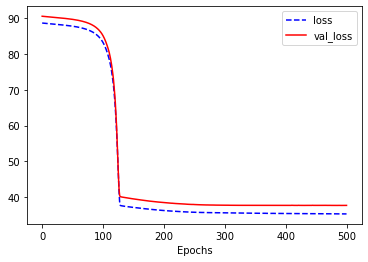

In [14]:
import matplotlib.pyplot as plt

mae = history.history['mae']
loss = history.history['loss']
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']
epochs = range(len(mae))

# Plot loss & validation loss
plt.figure()
plt.plot(epochs, loss, '--b')
plt.plot(epochs, val_loss, '-r')
plt.xlabel("Epochs")
plt.legend(["loss", "val_loss"])
plt.show()

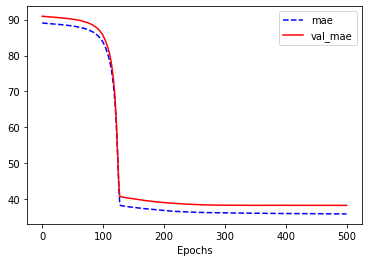

In [15]:
# Plot mae & validation mae
plt.figure()
plt.plot(epochs, mae, '--b')
plt.plot(epochs, val_mae, '-r')
plt.xlabel("Epochs")
plt.legend(["mae", "val_mae"])
plt.show()

# Testing

In [26]:
prediction = model.predict(test_features[0:8])

In [27]:
mse = tf.keras.metrics.mean_squared_error(test_label[0:8], prediction).numpy()
mae = tf.keras.metrics.mean_absolute_error(test_label[0:8], prediction).numpy()


print('MSE = ', mse)
print('MAE = ', mae)

MSE =  [3746.255  3727.4653 3662.0735 3780.8794 3640.5002 3653.2424 3626.3665
 3595.5244]
MAE =  [40.289368 40.289368 40.563244 40.289368 40.7299   40.63064  40.842995
 41.28183 ]


In [18]:
prediction = model.predict(train_features)

In [19]:
index = range(len(prediction))

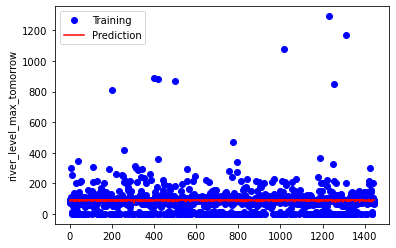

In [20]:
plt.figure()
plt.plot(index, train_label, 'ob')
plt.plot(index, prediction, '-r')
plt.legend(["Training", "Prediction"])
plt.ylabel("river_level_max_tomorrow")
plt.show()

In [21]:
prediction = model.predict(test_features)
index = range(len(prediction))

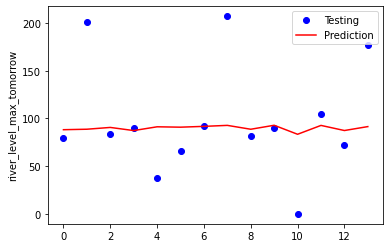

In [22]:
plt.figure()
plt.plot(index, test_label, 'ob')
plt.plot(index, prediction, '-r')
plt.legend(["Testing", "Prediction"])
plt.ylabel("river_level_max_tomorrow")
plt.show()

# Generate a saved model

In [31]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/assets


# Convert the saved model to TFLite

In [32]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()